# Clasificador de Naive Bayes
## Base de datos iris plant

In [379]:
import pandas as pd
import numpy as np
from sklearn import preprocessing,cross_validation
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,roc_curve,auc,precision_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import math as math
import scipy.stats as stats
import seaborn as sbs

In [310]:
#recuperando base de datos
ds_original = pd.read_csv("../datasets/iris_plant/iris_plant.csv")
#base de datos con la que vamos a trabajar
ds = ds_original

In [311]:
#separando patrones y targets
X = ds[["sepal.length","sepal.width","petal.length","petal.width"]]
y = ds[["variety"]]

In [312]:
#renombrando las columnas de los patrones
#v1=sepal.length,v2=sepal.width,v3=petal.length,v4=petal.width
X.columns = [["v1","v2","v3","v4"]]

In [313]:
#cambiando valores string de la columna variety
#usando método en cascada 1 para Setosa, 2 para Versicolor y Virginica
mapping = {'Setosa':1,'Versicolor':0,'Virginica':0}
y.variety = [mapping[item] for item in y.variety]

C:\Anaconda3\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [314]:
#PCA usando sklearn
#porcentaje de información que se desea mantener de los datos
informacion = 0.95
pca = PCA(n_components=informacion) 
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [315]:
#proyectando el nuevo espacio de características obtenidas con PCA
X_reduced = pca.fit_transform(X)
#convirtiendo a dataframe para un mejor manejo
X_reduced = pd.DataFrame(X_reduced)

In [316]:
#renombrando columnas del nuevo dataframe
X_reduced.columns = [["x1","x2"]]

Text(0.5,1,'Distribución del nuevo espacio')

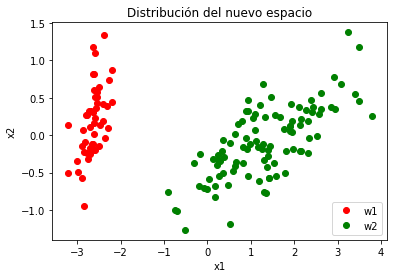

In [323]:
#recuperando el nuevo espacio vectorial, reducido a dos caracteristicas
#Nota: guarde X_reduced,y
#X_reduced.to_csv("../naive bayes/X_reduced.csv",index=False)
#y.to_csv("../naive bayes/y.csv",index=False)
#Nota 2: ds_nuevo solo lo ocupo para pintar el plot de distribución del nuevo espacio
ds_nuevo = pd.read_csv("../naive bayes/nuevo_espacio.csv")
w1 = ds_nuevo[ds_nuevo['variety'] == 1]
w2 = ds_nuevo[ds_nuevo['variety'] == 0]

plt.plot(w1["x1"],w1["x2"],'ro')
plt.plot(w2["x1"],w2["x2"],'go')

plt.legend(["w1","w2"])
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Distribución del nuevo espacio")

In [324]:
#función para ajustar clasficador y retornar la precisión del mismo
def get_score(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    return model.score(X_test,y_test)

In [334]:
def info_separacion(data_train,data_test,target_train,target_test):
    print('data train',len(data_train))
    print('target train',len(target_train))
    print('data test',len(data_test))
    print('target test',len(target_test))
    print('shape train',data_train.shape,target_train.shape)
    print('shape test',data_test.shape,target_test.shape)

In [337]:
#tamaño del conjunto de prueba
tst_size = 0.2

In [338]:
#separación del dataset en datos de entrenamiento y de prueba usando X_reduced
X_train,X_test,y_train,y_test = train_test_split(X_reduced,y,test_size=tst_size)
info_separacion(X_train,X_test,y_train,y_test)

data train 120
target train 120
data test 30
target test 30
shape train (120, 2) (120, 1)
shape test (30, 2) (30, 1)


In [339]:
#separacion del dataset en entrenamiendo y prueba usando las 4 características
X_entren,X_prueba,y_entren,y_prueba = train_test_split(X,y,test_size=tst_size)
info_separacion(X_entren,X_prueba,y_entren,y_prueba)

data train 120
target train 120
data test 30
target test 30
shape train (120, 4) (120, 1)
shape test (30, 4) (30, 1)


In [340]:
#precisión del modelo usando X_reduced
get_score(GaussianNB(),X_train,X_test,y_train.values.ravel(),y_test)

1.0

In [342]:
#precisión del modelo usando X_reduced
get_score(GaussianNB(),X_entren,X_prueba,y_entren.values.ravel(),y_prueba)

1.0

In [361]:
#instanciando modelo de clasificacion Naive Bayes
NB_xreduced = GaussianNB()
NB_xreduced.fit(X_test,y_test.values.ravel())
#predicciones del clasificador, utilizando datos de prueba de X_reduced
y_predicted = NB_xreduced.predict(X_test)
print(y_predicted)
print(y_test.values.ravel())
#calculando la presicion (accuracy) del clasificador con X_reduced
accuracy = accuracy_score(y_predicted,y_test)
print('accuracy X_reduced',accuracy*100)

[0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0]
[0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0]
accuracy X_reduced 100.0


In [390]:
knn = KNeighborsClassifier(n_neighbors=5,p=2)

In [391]:
knn.fit(X_train,y_train.values.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [392]:
knn_predicted = knn.predict(X_test)

In [393]:
print(knn_predicted)
print(y_test.values.ravel())

[0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0]
[0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0]


In [362]:
#instanciando modelo de clasificacion Naive Bayes
NB_x = GaussianNB()
NB_x.fit(X_prueba,y_prueba.values.ravel())
#predicciones del clasificador, utilizando datos de prueba de X_reduced
y_prediccion = NB_x.predict(X_prueba)
print(y_prediccion)
print(y_prueba.values.ravel())
#calculando la presicion (accuracy) del clasificador con X completo
accuracy = accuracy_score(y_prediccion,y_prueba)
print('accuracy X',accuracy*100)

[0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1]
[0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1]
accuracy X 100.0


In [363]:
#otra forma de dividir los datos de prueba y entrenamiento para X_reduced
#definiendo el número de k folds
#kf = KFold(n_splits=3)
k_folds =3
scores = cross_val_score(GaussianNB(),X_reduced,y.values.ravel(),cv=k_folds)
print(scores)

[1. 1. 1.]


In [364]:
#otra forma de dividir los datos de prueba y entrenamiento para X
#definiendo el número de k folds
#kf = KFold(n_splits=3)
k_folds =3
scores = cross_val_score(GaussianNB(),X,y.values.ravel(),cv=k_folds)
print(scores)

[1. 1. 1.]


In [365]:
#matriz de confusión para X_reduced y X
X_reduced_confusion_ma = confusion_matrix(y_test,y_predicted)
X_confusion_ma = confusion_matrix(y_prueba,y_prediccion)

In [371]:
def plot_conf_ma(confusion_ma):
    w=["w1","w2"]
    sbs.heatmap(data=confusion_ma,cmap="Pastel1",annot=True,xticklabels=w,yticklabels=w)
    plt.xlabel("Actual")
    plt.ylabel("predicción")
    plt.title("Matriz de confusión")

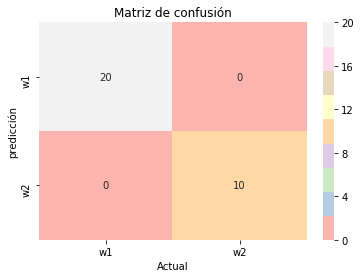

In [372]:
#matriz de confusión para X_reduced
plot_conf_ma(X_reduced_confusion_ma)

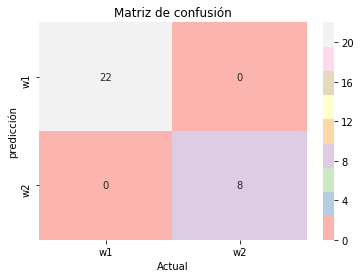

In [373]:
#matriz de confusión para X
plot_conf_ma(X_confusion_ma)

In [289]:
TN = confusion_ma[0][0]
TP = confusion_ma[1][1]
FN = confusion_ma[0][1]
FP = confusion_ma[1][0]

In [292]:
#sensibilidad y especificidad
sens = TP/(TP+FN)
espec_1 = 1-TN/(TN+FP)

In [300]:
#array de probabilidades
probs = clf_NB.predict_proba(X_test)

In [307]:
roc_curve?